## Stockdata Api

In [13]:
import requests
from dotenv import load_dotenv
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

load_dotenv()
api_key = os.getenv("ALPHA_API_KEY")
symbol = "AAPL"
data = ["Time Series (Daily)"]
print(data)

url = f"https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol={symbol}&apikey={api_key}"
data = requests.get(url).json()
#data['Time Series (Daily)']

['Time Series (Daily)']


In [2]:
df = pd.DataFrame(data['Time Series (Daily)']).transpose().astype(float)
df.head()

,1. open,2. high,3. low,4. close,5. volume
2021-10-29,147.215,149.940,146.4128,149.80,124953168.0
2021-10-28,149.820,153.165,149.7200,152.57,100077888.0
2021-10-27,149.360,149.730,148.4900,148.85,56094929.0
2021-10-26,149.330,150.840,149.0101,149.32,60893395.0
2021-10-25,148.680,149.370,147.6211,148.64,50720556.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 2021-10-29 to 2021-06-10
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   1. open    100 non-null    float64
 1   2. high    100 non-null    float64
 2   3. low     100 non-null    float64
 3   4. close   100 non-null    float64
 4   5. volume  100 non-null    float64
dtypes: float64(5)
memory usage: 4.7+ KB


In [4]:
df.index

Index(['2021-10-29', '2021-10-28', '2021-10-27', '2021-10-26', '2021-10-25',
       '2021-10-22', '2021-10-21', '2021-10-20', '2021-10-19', '2021-10-18',
       '2021-10-15', '2021-10-14', '2021-10-13', '2021-10-12', '2021-10-11',
       '2021-10-08', '2021-10-07', '2021-10-06', '2021-10-05', '2021-10-04',
       '2021-10-01', '2021-09-30', '2021-09-29', '2021-09-28', '2021-09-27',
       '2021-09-24', '2021-09-23', '2021-09-22', '2021-09-21', '2021-09-20',
       '2021-09-17', '2021-09-16', '2021-09-15', '2021-09-14', '2021-09-13',
       '2021-09-10', '2021-09-09', '2021-09-08', '2021-09-07', '2021-09-03',
       '2021-09-02', '2021-09-01', '2021-08-31', '2021-08-30', '2021-08-27',
       '2021-08-26', '2021-08-25', '2021-08-24', '2021-08-23', '2021-08-20',
       '2021-08-19', '2021-08-18', '2021-08-17', '2021-08-16', '2021-08-13',
       '2021-08-12', '2021-08-11', '2021-08-10', '2021-08-09', '2021-08-06',
       '2021-08-05', '2021-08-04', '2021-08-03', '2021-08-02', '2021-07-30',

In [5]:
df.index = pd.to_datetime(df.index)
print(df.index.dtype)
df.head()

datetime64[ns]


,1. open,2. high,3. low,4. close,5. volume
2021-10-29,147.215,149.940,146.4128,149.80,124953168.0
2021-10-28,149.820,153.165,149.7200,152.57,100077888.0
2021-10-27,149.360,149.730,148.4900,148.85,56094929.0
2021-10-26,149.330,150.840,149.0101,149.32,60893395.0
2021-10-25,148.680,149.370,147.6211,148.64,50720556.0


In [6]:
df.loc["2021-10-20":"2021-10-29"]

,1. open,2. high,3. low,4. close,5. volume
2021-10-29,147.215,149.940,146.4128,149.80,124953168.0
2021-10-28,149.820,153.165,149.7200,152.57,100077888.0
2021-10-27,149.360,149.730,148.4900,148.85,56094929.0
2021-10-26,149.330,150.840,149.0101,149.32,60893395.0
2021-10-25,148.680,149.370,147.6211,148.64,50720556.0
2021-10-22,149.690,150.180,148.6400,148.69,58883443.0
2021-10-21,148.810,149.640,147.8700,149.48,61420990.0


In [2]:
import time
import requests
from dotenv import load_dotenv
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

symbols = ["AAPL", "TSLA", "SOS", "BB"]
stock_list = []

load_dotenv()
api_key = os.getenv("ALPHA_API_KEY")


for symbol in symbols:
    url = f"https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol={symbols}&apikey={api_key}"
    data = requests.get(url).json()
    df = pd.DataFrame(data["Time Series (Daily)"]).transpose()
    df = df["4. close"].rename(symbol).astype(float)
    stock_list.append(df)
    time.sleep(10)


AttributeError: 'dict' object has no attribute 'index'

In [3]:
stocks = pd.concat(stock_list, axis=1)
stocks.to_csv("stocks.csv")

ValueError: No objects to concatenate

In [6]:
stocks = pd.read_csv("stocks.csv", index_col=0, parse_dates=True)
stocks.index 
stocks.head()

,AAPL,TSLA,NVDA,IBM
2021-10-29,149.80,1114.00,255.67,125.10
2021-10-28,152.57,1077.04,249.41,125.84
2021-10-27,148.85,1037.86,244.51,125.17
2021-10-26,149.32,1018.43,247.17,127.13
2021-10-25,148.64,1024.86,231.66,127.64


In [7]:
stocks.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5536 entries, 2021-10-29 to 1999-11-01
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    5536 non-null   float64
 1   TSLA    2856 non-null   float64
 2   NVDA    5536 non-null   float64
 3   IBM     5536 non-null   float64
dtypes: float64(4)
memory usage: 216.2 KB


(2, 2)
(4,)


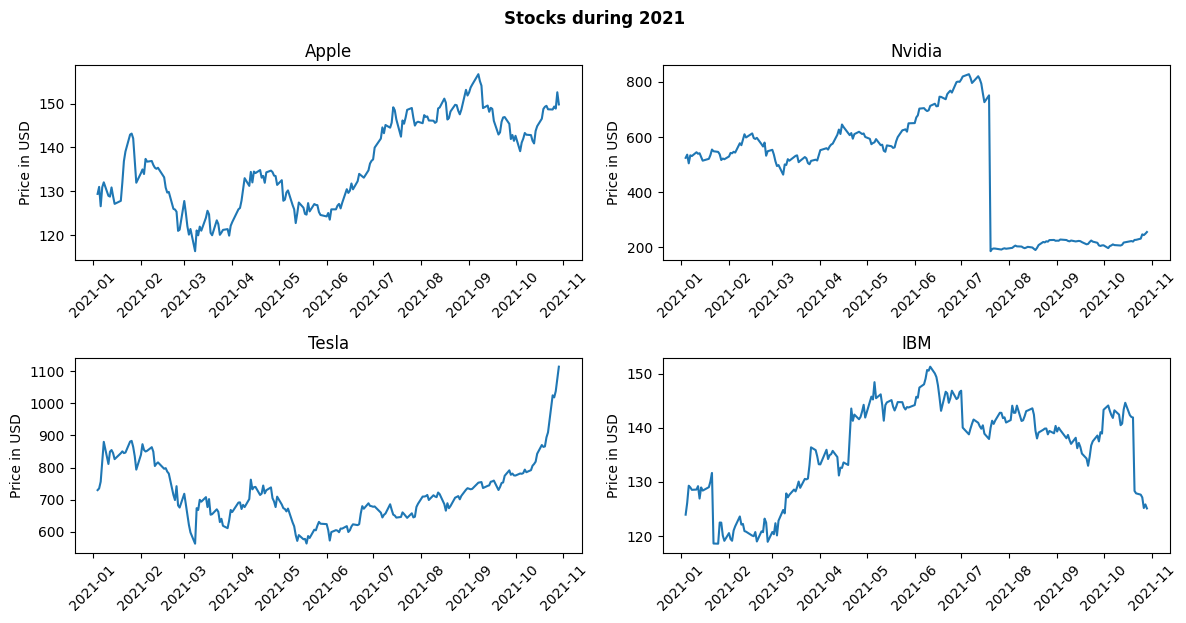

In [24]:
fig, axes = plt.subplots(2,2, dpi=100, figsize=(12,6))
print(axes.shape)
print(axes.flatten().shape)

stock_2021 = stocks.loc["2021"]

stock_names = dict(AAPL ="Apple", NVDA = "Nvidia", TSLA = "Tesla", IBM = "IBM")
for ax, symbol in zip(axes.flatten(), stock_names):
    sns.lineplot(data=stock_2021, x=stock_2021.index, y=symbol, ax=ax)
    ax.tick_params(axis="x", rotation=45)
    ax.set(title=f"{stock_names[symbol]}", ylabel="Price in USD")

fig.tight_layout()
fig.suptitle("Stocks during 2021", y=1.03, fontweight="bold")
plt.savefig("stocks2021.png", facecolor="white")
